Flow of Analysis :
1. Import the required libraries 
2. Read and understand the data 
3. Data cleanup and preparation
4. Exploratory Data Analysis
5. Model building
6. Hyperparameters Tuning
7. Cost Benefit Analysis

# 1. Import the required libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
# Adjusting the display to fit rows and columns effectively
start_time = time.time()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
from datetime import datetime, date
import math
from math import radians, sin, cos, acos, atan2
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# 2. Read and understand the data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Medium

Mounted at /content/drive
/content/drive/MyDrive/Medium


In [6]:
data_train = pd.read_csv(r'fraudTrain.csv')
data_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
data_test = pd.read_csv(r'fraudTest.csv')
data_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
# Checking the number of columns and rows in the dataset
print(data_train.shape)
print(data_test.shape)

(1296675, 23)
(555719, 23)


In [9]:
# Checking for duplicates and deleteing the duplicate records. 

data_train.drop_duplicates()
data_test.drop_duplicates()

print(data_train.shape)
print(data_test.shape)

(1296675, 23)
(555719, 23)


In [10]:
# Checking the fields and their datatypes. 

data_train.info(verbose=True) # We see that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [11]:
data_test.info(verbose=True) # We see that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [12]:
# Check statistical information abut numerical fields.

data_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# 3. Data Cleaning and Preparation


In [13]:
data_train['is_fraud'].value_counts(normalize=True) # check the class imbalance of target variable is_fraud in train set


0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

In [14]:
data_test['is_fraud'].value_counts(normalize=True) # check the class imbalance of target variable is_fraud in train set

0    0.99614
1    0.00386
Name: is_fraud, dtype: float64

In [15]:
data = pd.concat([data_train, data_test]) # Forming a consolidated dataset


In [16]:
data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [17]:
# Confirm if the concatenation is proper
data.shape  

(1852394, 23)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

## Check missing values

In [19]:
#column wise null or missing check or sorting them in ascending order
data.isnull().sum().sort_values()

Unnamed: 0               0
merch_lat                0
unix_time                0
trans_num                0
dob                      0
job                      0
city_pop                 0
long                     0
lat                      0
zip                      0
merch_long               0
state                    0
street                   0
gender                   0
last                     0
first                    0
amt                      0
category                 0
merchant                 0
cc_num                   0
trans_date_trans_time    0
city                     0
is_fraud                 0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [21]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [22]:
data['Unnamed: 0'].value_counts()

0          2
370474     2
370488     2
370487     2
370486     2
          ..
802705     1
802706     1
802707     1
802708     1
1296674    1
Name: Unnamed: 0, Length: 1296675, dtype: int64

In [23]:
data_test.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [24]:
# Dropping unwanted columns

cols_to_delete = ['Unnamed: 0', 'cc_num', 'street', 'zip', 'trans_num', 'unix_time' ] 
data.drop(cols_to_delete, axis = 1, inplace = True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   merchant               object 
 2   category               object 
 3   amt                    float64
 4   first                  object 
 5   last                   object 
 6   gender                 object 
 7   city                   object 
 8   state                  object 
 9   lat                    float64
 10  long                   float64
 11  city_pop               int64  
 12  job                    object 
 13  dob                    object 
 14  merch_lat              float64
 15  merch_long             float64
 16  is_fraud               int64  
dtypes: float64(5), int64(2), object(10)
memory usage: 254.4+ MB


## Feature Engineering



In [26]:
# Create a column customer name with columns first and last 

data['Customer_name'] = data['first']+" "+data['last']
data.drop(['first','last'], axis=1, inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   merchant               object 
 2   category               object 
 3   amt                    float64
 4   gender                 object 
 5   city                   object 
 6   state                  object 
 7   lat                    float64
 8   long                   float64
 9   city_pop               int64  
 10  job                    object 
 11  dob                    object 
 12  merch_lat              float64
 13  merch_long             float64
 14  is_fraud               int64  
 15  Customer_name          object 
dtypes: float64(5), int64(2), object(9)
memory usage: 240.3+ MB


In [28]:
# Analyse city_pop variable

print("Min population : ", data['city_pop'].min())
print("Max population : ", data['city_pop'].max())

Min population :  23
Max population :  2906700


In [29]:
# Create a categorical column Population_group by binning the variable city_pop

data["Population_group"] = pd.cut(data["city_pop"], bins=list(range(0,3000001,500000)), labels = ["<5lac","5-10lac","10-15lac","15-20","20-25lac","25-30lac"])

In [30]:
data["Population_group"].value_counts()

<5lac       1758657
5-10lac       46877
10-15lac      21224
15-20         16105
25-30lac       8794
20-25lac        737
Name: Population_group, dtype: int64

In [31]:
# Create a column age from dob variable

data['dob'] = pd.to_datetime(data['dob'])

In [32]:
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [33]:
# Create a column age
data['age'] = data["dob"].apply(calculate_age)

In [34]:
# Create a column age_group from the column age
data["age_group"] = pd.cut(data["age"], bins=[0,25,40,60,80,9999], labels = ["<25","25-40","40-60","60-80","80+"])

In [35]:
#pip install mpu --user

In [36]:
# Calculating distance using customer co-ordinates and merchant co-ordinates
#import mpu


#data['distance'] = mpu.haversine_distance((data['merch_lat'], data['merch

In [37]:
# Calculating distance between the customer and merchant location using customer location co-ordinates(lat and long) 
# and merchant location co-ordinates(merch_lat and merch_long)

R = 6373.0  # radius of the Earth

data['lat'] = data['lat'].astype('float')
data['long'] = data['long'].astype('float')
data['merch_lat'] = data['merch_lat'].astype('float')
data['merch_long'] = data['merch_long'].astype('float')#coordinates

In [38]:
data['lat'] = np.radians(data['lat'])
data['long'] = np.radians(data['long'])
data['merch_lat'] = np.radians(data['merch_lat'])
data['merch_long'] = np.radians(data['merch_long'])

In [39]:
data['dlon'] = data['merch_long'] - data['long'] #change in coordinates
data['dlat'] = data['merch_lat'] - data['lat']

In [40]:
a = np.sin(data['dlat'] / 2)**2 + np.cos(data['lat']) * np.cos(data['merch_lat']) * np.sin(data['dlon'] / 2)**2  #Haversine formula

In [41]:
c = 2*2*np.arctan2(np.sqrt(a), np.sqrt(1 - a))
data['distance'] = R * c

In [42]:
data['distance'].head()

0    157.244484
1     60.443320
2    216.480102
3    191.406530
4    155.162181
Name: distance, dtype: float64

In [43]:
data['distance'].min()

0.0445230036617093

In [44]:
data['distance'].max()

304.3298522066305

In [45]:
data['distance'].describe()

count    1.852394e+06
mean     1.522712e+02
std      5.825222e+01
min      4.452300e-02
25%      1.106749e+02
50%      1.564819e+02
75%      1.970808e+02
max      3.043299e+02
Name: distance, dtype: float64

In [46]:
# Create a column dist_range_km from the column distance
data["dist_range_km"] = pd.cut(data["distance"], bins=[0,25,50,100,150,200,250,300,9999], labels = ["<25","25-50","50-100","100-150","150-200","200-250","250-300","300+"])

In [47]:
data.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,Customer_name,Population_group,age,age_group,dlon,dlat,distance,dist_range_km
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,0.629694,-1.416825,3495,"Psychologist, counselling",1988-03-09,0.628516,-1.432013,0,Jennifer Banks,<5lac,34,25-40,-0.015188,-0.001178,157.244484,150-200
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,0.853253,-2.063162,149,Special educational needs teacher,1978-06-21,0.857987,-2.062743,0,Stephanie Gill,<5lac,44,40-60,0.000420,0.004734,60.443320,50-100
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,0.736194,-1.959342,4154,Nature conservation officer,1962-01-19,0.753122,-1.957465,0,Edward Sanchez,<5lac,60,40-60,0.001877,0.016928,216.480102,200-250
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,0.806876,-1.956755,1939,Patent attorney,1967-01-12,0.820904,-1.964561,0,Jeremy White,<5lac,55,40-60,-0.007806,0.014028,191.406530,150-200
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,0.670568,-1.386889,99,Dance movement psychotherapist,1986-03-28,0.675006,-1.372395,0,Tyler Garcia,<5lac,36,25-40,0.014494,0.004438,155.162181,150-200


In [48]:
data.drop(['dlat', 'dlon'], axis=1, inplace=True)

In [49]:
data.drop(['dob','city_pop'], axis=1, inplace=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   trans_date_trans_time  object  
 1   merchant               object  
 2   category               object  
 3   amt                    float64 
 4   gender                 object  
 5   city                   object  
 6   state                  object  
 7   lat                    float64 
 8   long                   float64 
 9   job                    object  
 10  merch_lat              float64 
 11  merch_long             float64 
 12  is_fraud               int64   
 13  Customer_name          object  
 14  Population_group       category
 15  age                    int64   
 16  age_group              category
 17  distance               float64 
 18  dist_range_km          category
dtypes: category(3), float64(6), int64(2), object(8)
memory usage: 245.6+ MB


In [51]:
# Transaction date and time column

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [52]:
# Extract year and month from trans_date_trans_time column

data['year'] = pd.DatetimeIndex(data['trans_date_trans_time']).year
data['month'] = pd.DatetimeIndex(data['trans_date_trans_time']).month

In [53]:
# Extract day of the week and transaction hour from trans_date_trans_time column

data['day_of_week'] = data['trans_date_trans_time'].dt.day_name()
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

In [54]:
data.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,job,merch_lat,merch_long,is_fraud,Customer_name,Population_group,age,age_group,distance,dist_range_km,year,month,day_of_week,transaction_hour
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,0.629694,-1.416825,"Psychologist, counselling",0.628516,-1.432013,0,Jennifer Banks,<5lac,34,25-40,157.244484,150-200,2019,1,Tuesday,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,0.853253,-2.063162,Special educational needs teacher,0.857987,-2.062743,0,Stephanie Gill,<5lac,44,40-60,60.443320,50-100,2019,1,Tuesday,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,0.736194,-1.959342,Nature conservation officer,0.753122,-1.957465,0,Edward Sanchez,<5lac,60,40-60,216.480102,200-250,2019,1,Tuesday,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,0.806876,-1.956755,Patent attorney,0.820904,-1.964561,0,Jeremy White,<5lac,55,40-60,191.406530,150-200,2019,1,Tuesday,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,0.670568,-1.386889,Dance movement psychotherapist,0.675006,-1.372395,0,Tyler Garcia,<5lac,36,25-40,155.162181,150-200,2019,1,Tuesday,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   job                    object        
 10  merch_lat              float64       
 11  merch_long             float64       
 12  is_fraud               int64         
 13  Customer_name          object        
 14  Population_group       category      
 15  age                    int64         
 16  age_group              category      
 17  distance               float64       
 18  dist_range_km          

# 4. Exploratory Data Analysis


## 4.1 Univariate Analysis

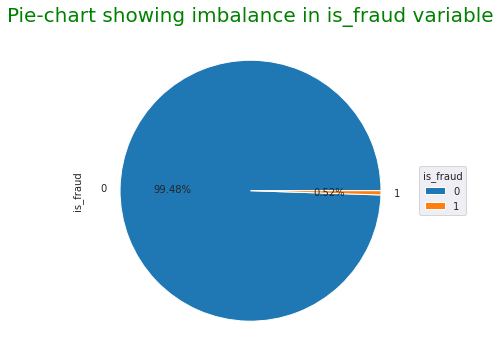

In [56]:
# TARGET variable is_fraud

plt.figure(figsize= (10,6))
fig = data["is_fraud"].value_counts(normalize = True).plot.pie(autopct='%1.2f%%')
plt.title("Pie-chart showing imbalance in is_fraud variable", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
fig.legend(title="is_fraud",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Inference : As we can see, the dataset is imbalanced with 0.52% of transactions being fraudulent and 99.48% transactions being non-fraudulent

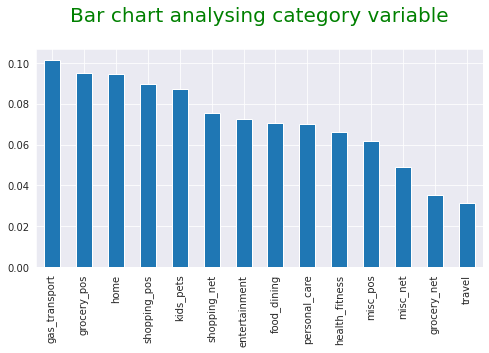

In [57]:
# Category variable 

plt.figure(figsize= (8,4))
data["category"].value_counts(normalize = True).plot.bar()
plt.title("Bar chart analysing category variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

Inference : Maximum transactions in the dataset belong to merchants falling in gas_transport category and least being travel category.

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   job                    object        
 10  merch_lat              float64       
 11  merch_long             float64       
 12  is_fraud               int64         
 13  Customer_name          object        
 14  Population_group       category      
 15  age                    int64         
 16  age_group              category      
 17  distance               float64       
 18  dist_range_km          

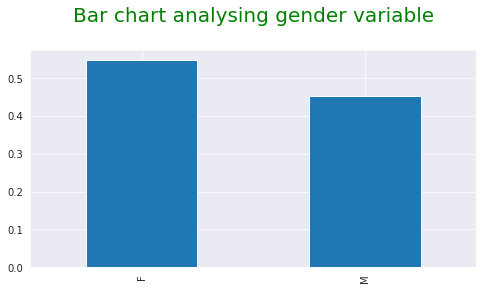

In [59]:
# gender variable 

plt.figure(figsize= (8,4))
data["gender"].value_counts(normalize = True).plot.bar()
plt.title("Bar chart analysing gender variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

Inference : Maximum transactions in the dataset are performed by females.


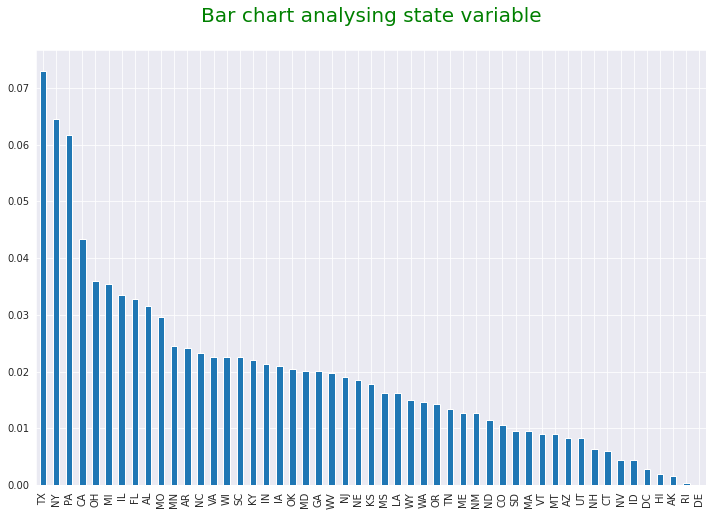

In [60]:
# Population_group variable 

plt.figure(figsize= (12,8))
data["state"].value_counts(normalize = True).plot.bar()
plt.title("Bar chart analysing state variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

Inference : Maximum transactions in the dataset take place in Texas and least being in Delaware state.

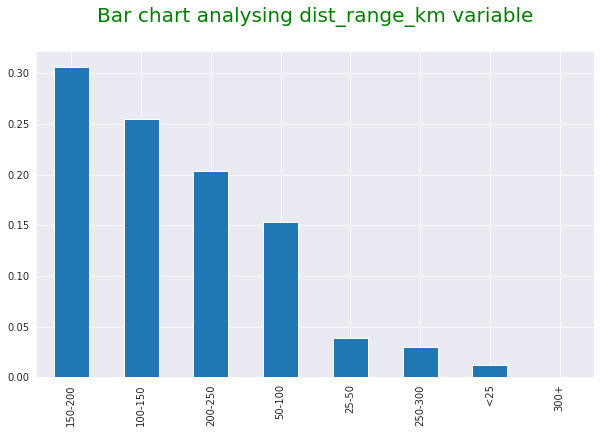

In [61]:
# dist_range_km variable

plt.figure(figsize= (10,6))
data["dist_range_km"].value_counts(normalize = True).plot.bar()
plt.title("Bar chart analysing dist_range_km variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

Inference : Maximum transactions are performed in the distance range 152-200 kms from customer location.

## 4.2 Bivariate Analysis


### 4.2.1 Numeric - numeric analysis



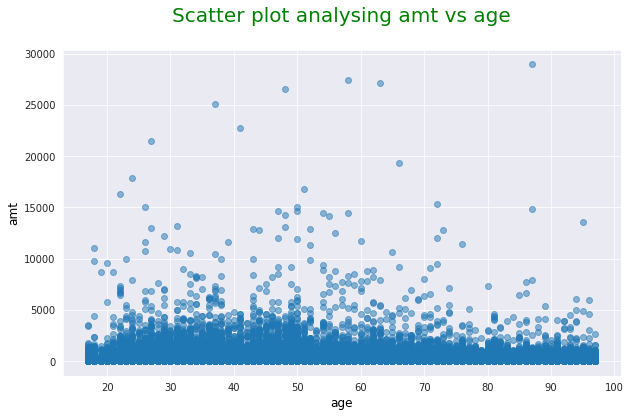

In [62]:
# amt vs age

plt.figure(figsize= [10,6])
plt.scatter(data["age"], data["amt"], alpha = 0.5)
plt.title("Scatter plot analysing amt vs age\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("age", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("amt", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

Inference : We can say that people of all age groups usually perform transactions less than 5000 dollars



In [63]:
fraud_data = data[data['is_fraud']==1]

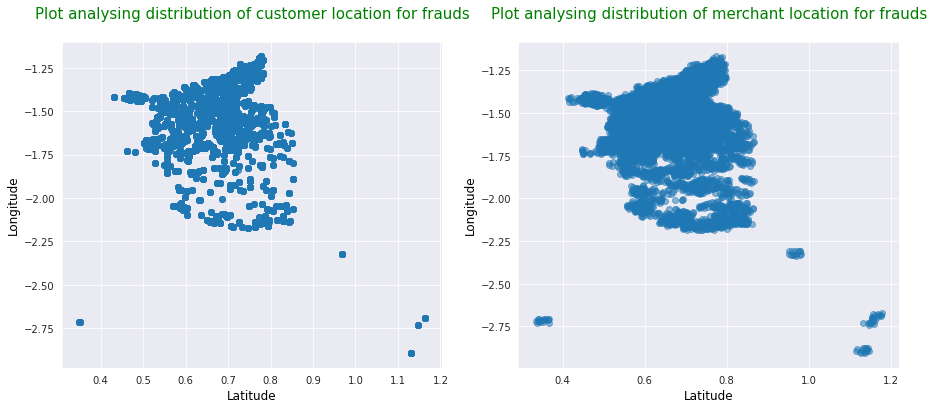

In [64]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(fraud_data["lat"], fraud_data["long"], alpha = 0.5)
plt.title("Plot analysing distribution of customer location for frauds\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Longitude", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("Latitude", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
plt.scatter(fraud_data["merch_lat"], fraud_data["merch_long"], alpha = 0.5)
plt.title("Plot analysing distribution of merchant location for frauds\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Longitude", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("Latitude", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

### 4.2.2 Numerical - Categorical variable analysis



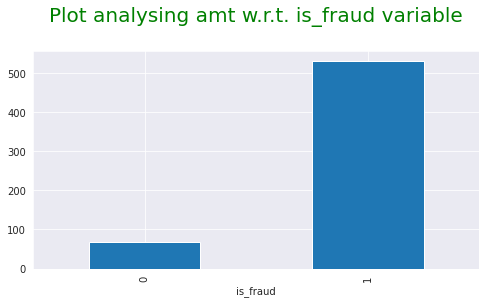

In [65]:
# is_fraud and amt

plt.figure(figsize= (8,4))
data.groupby("is_fraud")["amt"].mean().plot.bar()
plt.title("Plot analysing amt w.r.t. is_fraud variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

Inference: Averege amount of fraudulent transactions is greater than 500 dollars

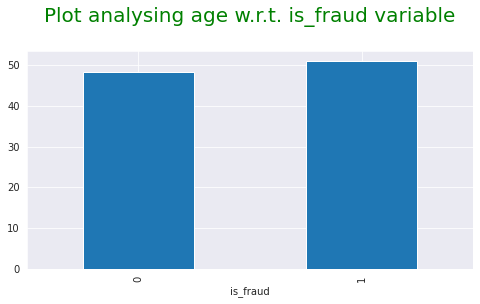

In [66]:
# is_fraud and age

plt.figure(figsize= (8,4))
data.groupby("is_fraud")["age"].mean().plot.bar()
plt.title("Plot analysing age w.r.t. is_fraud variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

Inference: On an average more people in 40-50 years age group have done fraudulent transactions than genuine transactions.

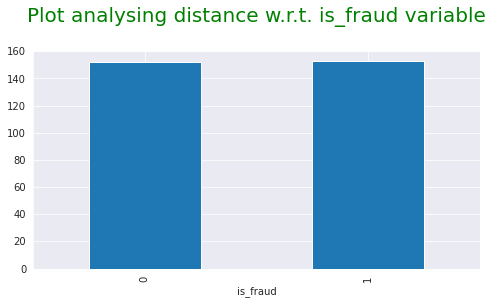

In [67]:
# is_fraud and distance

plt.figure(figsize= (8,4))
data.groupby("is_fraud")["distance"].mean().plot.bar()
plt.title("Plot analysing distance w.r.t. is_fraud variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

Inference : On an average transactions performed between the distance range 140-160 kms from customer locations have equal chances of being fraudelent and non-fraudulent.

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   job                    object        
 10  merch_lat              float64       
 11  merch_long             float64       
 12  is_fraud               int64         
 13  Customer_name          object        
 14  Population_group       category      
 15  age                    int64         
 16  age_group              category      
 17  distance               float64       
 18  dist_range_km          

### 4.2.3 Categorical-categorical variable analysis



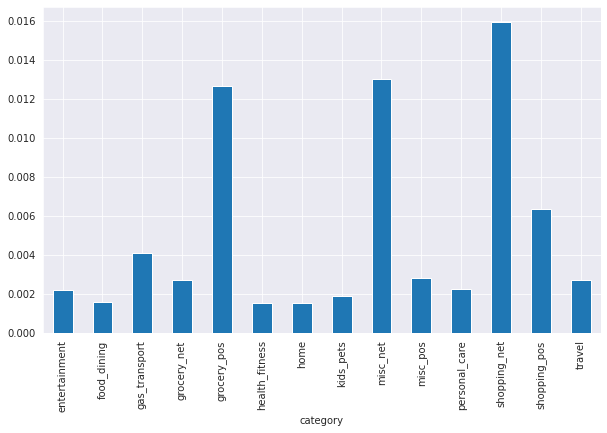

In [69]:
# category and is_fraud

plt.figure(figsize= (10,6))
data.groupby("category")["is_fraud"].mean().plot.bar()
plt.show()

Inference : Maximim fraudulent transactions are performed at merchants with category shopping_net

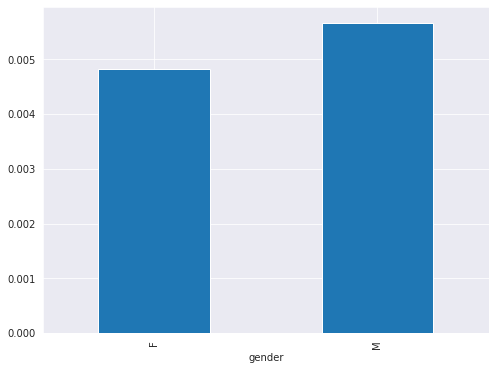

In [70]:
# gender and is_fraud

plt.figure(figsize= (8,6))
data.groupby("gender")["is_fraud"].mean().plot.bar()
plt.show()

Inference : Even though women have performed maximum transactions, men have performed more fraudulent transactions than women.

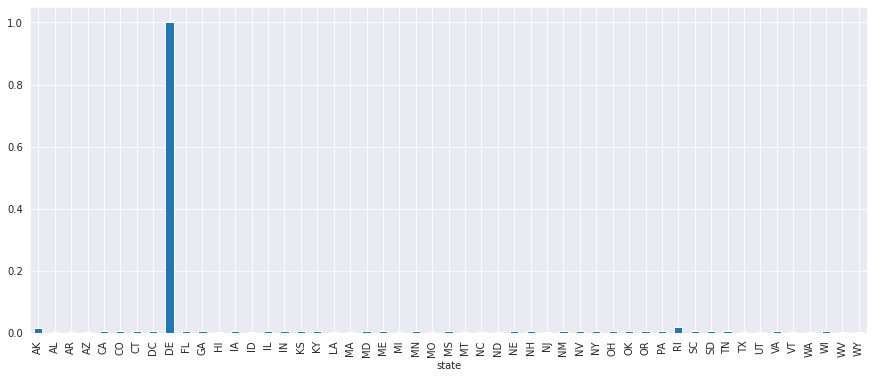

In [71]:
# state and is_fraud

plt.figure(figsize= (15,6))
data.groupby("state")["is_fraud"].mean().plot.bar()
plt.show()

Inference: Surprisingly, most of the transactions performed in Deleware (DE) are fraudulent, even though the number of actual transaction performed in Delaware(DE) are the least amongst all the states

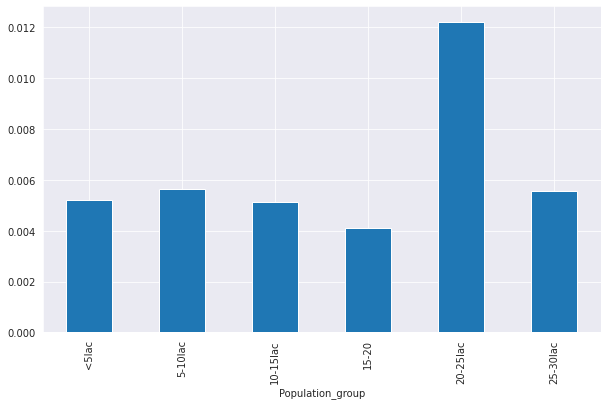

In [72]:
# Population_group and is_fraud

plt.figure(figsize= (10,6))
data.groupby("Population_group")["is_fraud"].mean().plot.bar()
plt.show()

Ineference : Maximum fraudulent transactions are performed in the areas with population range 20-25 lacs

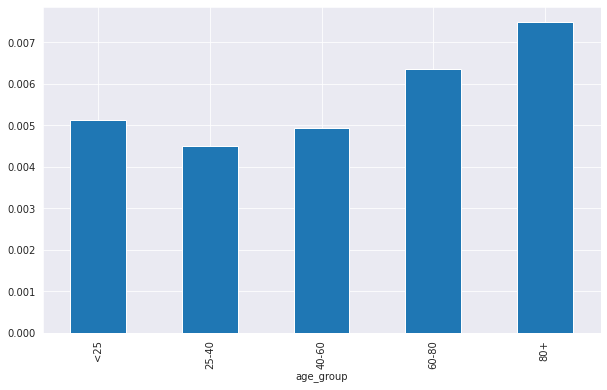

In [73]:
# age_group and is_fraud

plt.figure(figsize= (10,6))
data.groupby("age_group")["is_fraud"].mean().plot.bar()
plt.show()

Ineference : Whatever least transactions performed by people with 80+ years of age are fraudulent. This can indicate identity theft.

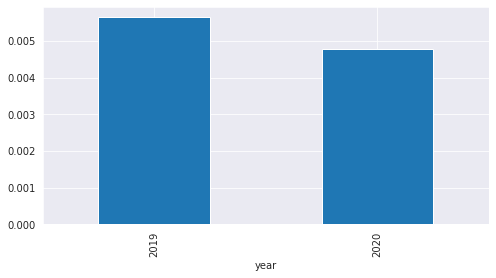

In [74]:
# year and is_fraud

plt.figure(figsize= (8,4))
data.groupby("year")["is_fraud"].mean().plot.bar()
plt.show()

Inference : More fraudulent transactions are performed in 2019 than the year 2020.

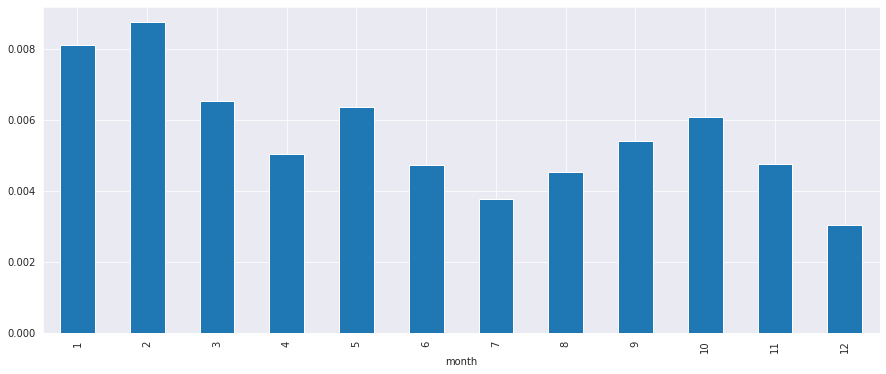

In [75]:
# month and is_fraud

plt.figure(figsize= (15,6))
data.groupby("month")["is_fraud"].mean().plot.bar()
plt.show()

Inference: Maximum fraudulent transactions are performed in the month of February.

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   job                    object        
 10  merch_lat              float64       
 11  merch_long             float64       
 12  is_fraud               int64         
 13  Customer_name          object        
 14  Population_group       category      
 15  age                    int64         
 16  age_group              category      
 17  distance               float64       
 18  dist_range_km          

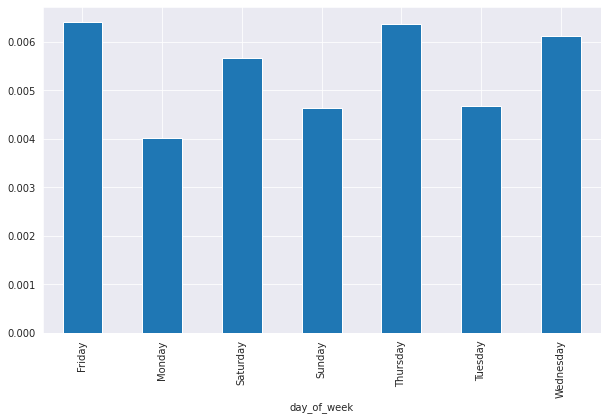

In [77]:
# day_of_week and is_fraud

plt.figure(figsize= (10,6))
data.groupby("day_of_week")["is_fraud"].mean().plot.bar()
plt.show()

Inference : Maximum fraudulent transactions take place on a Friday and a Thursday



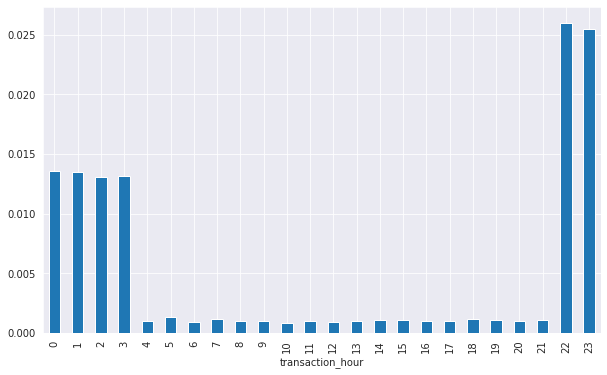

In [78]:
# transaction_hour and is_fraud

plt.figure(figsize= (10,6))
data.groupby("transaction_hour")["is_fraud"].mean().plot.bar()
plt.show()

Inference : As per our HYPOTHESIS, maximum fraudulent transactions take place during ODD HOURS that is late at night

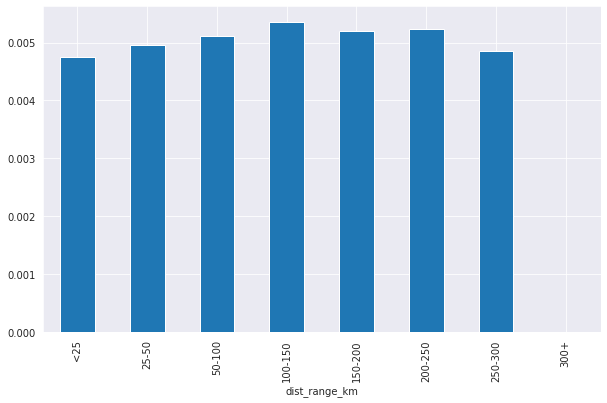

In [79]:
# dist_range_km and is_fraud

plt.figure(figsize= (10,6))
data.groupby("dist_range_km")["is_fraud"].mean().plot.bar()
plt.show()

Inference: Maximum fraudulent transactions are performed in the distance range 100-150 kms from customer location.

### 4.3 Multivariate Analysis


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   job                    object        
 10  merch_lat              float64       
 11  merch_long             float64       
 12  is_fraud               int64         
 13  Customer_name          object        
 14  Population_group       category      
 15  age                    int64         
 16  age_group              category      
 17  distance               float64       
 18  dist_range_km          

In [81]:
#category v/s gender Type v/s is_fraud
pivot1 = pd.pivot_table(data = data, index = "gender", columns = "category", values = "is_fraud")
pivot1

category,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
gender,,,,,,,,,,,,,,
F,0.002705,0.002340,0.003078,0.002099,0.010639,0.002428,0.002573,0.002723,0.009927,0.003605,0.002724,0.011627,0.005819,0.003363
M,0.001622,0.000699,0.005377,0.003453,0.014900,0.000484,0.000315,0.000822,0.017053,0.001926,0.001457,0.021579,0.007072,0.002027


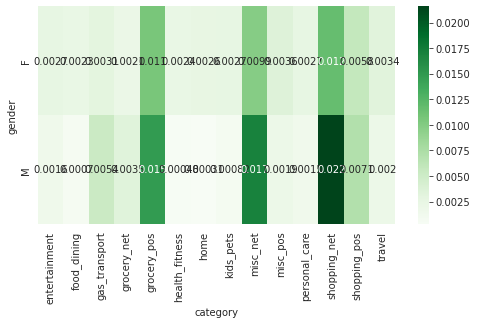

In [82]:
plt.figure(figsize= (8,4))
sns.heatmap(pivot1, cmap = "Greens", annot = True)
plt.show()

Inference: Most fraudulent transactions are performed by males in the category shopping_net

In [83]:
#state v/s gender Type v/s is_fraud
pivot2 = pd.pivot_table(data = data, index = "state", columns = "gender", values = "is_fraud")
pivot2

gender,F,M
state,,
AK,NaN,0.016875
AL,0.005165,0.004392
AR,0.004335,0.004445
AZ,0.003312,0.012203
CA,0.004844,0.005155
CO,0.002531,0.008850
CT,0.005359,0.003418
DC,0.004548,0.007165
DE,1.000000,NaN


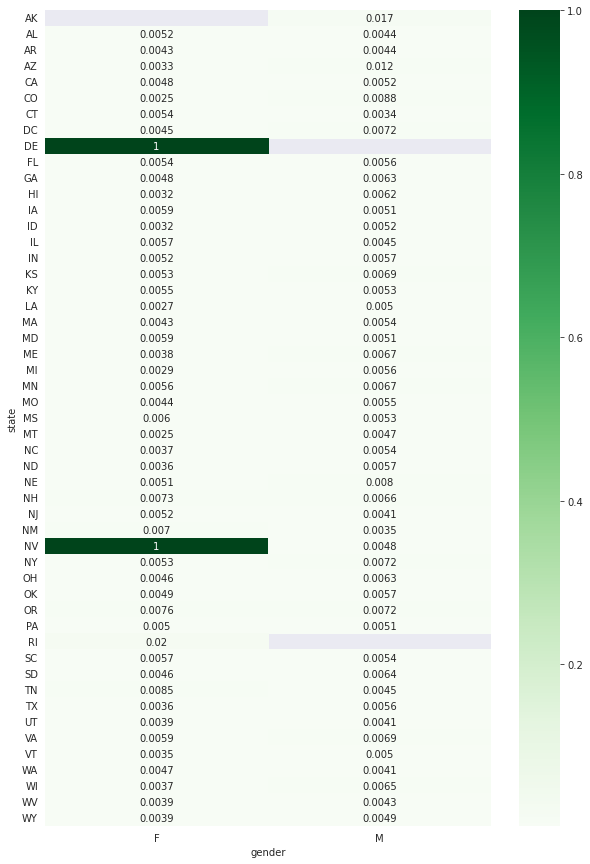

In [84]:
plt.figure(figsize= (10,15))
sns.heatmap(pivot2, cmap = "Greens", annot = True)
plt.show()

Inference : 100% transactions performed in the states DE and NV are performed by females and are fraudulent.

In [85]:
#age_group v/s gender Type v/s is_fraud
pivot3 = pd.pivot_table(data = data, index = "age_group", columns = "gender", values = "is_fraud")
pivot3

gender,F,M
age_group,,
<25,0.005329,0.004869
25-40,0.003984,0.005215
40-60,0.004310,0.005632
60-80,0.006596,0.006084
80+,0.006925,0.008392


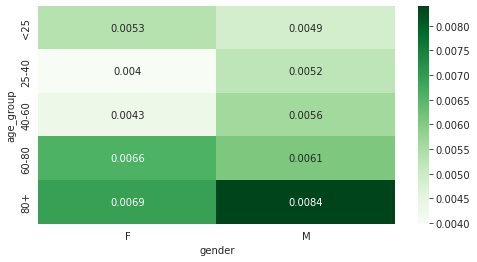

In [86]:
plt.figure(figsize= (8,4))
sns.heatmap(pivot3, cmap = "Greens", annot = True)
plt.show()

Inference : Transactions performed by 80+ years males are may be fraudulent.

In [87]:
#Population_group v/s dist_range_km Type v/s is_fraud
pivot4 = pd.pivot_table(data = data, index = "dist_range_km", columns = "Population_group", values = "is_fraud")
pivot4

Population_group,<5lac,5-10lac,10-15lac,15-20,20-25lac,25-30lac
dist_range_km,,,,,,
<25,0.004550,0.010471,0.003846,0.004902,0.000000,0.018349
25-50,0.004992,0.003311,0.006502,0.001667,0.000000,0.009146
50-100,0.005130,0.005057,0.004608,0.003854,0.017544,0.005385
100-150,0.005350,0.005918,0.005535,0.004631,0.011834,0.004231
150-200,0.005205,0.005542,0.005063,0.004098,0.009132,0.005267
200-250,0.005215,0.006124,0.005413,0.003293,0.012346,0.006316
250-300,0.004817,0.005380,0.002604,0.008130,0.033333,0.005376
300+,0.000000,NaN,NaN,NaN,NaN,NaN


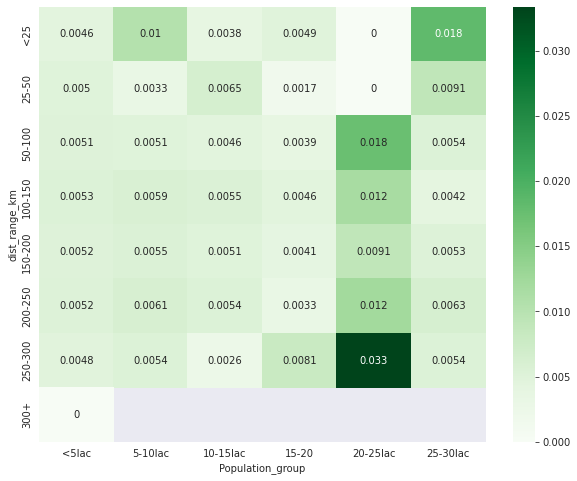

In [88]:
plt.figure(figsize= (10,8))
sns.heatmap(pivot4, cmap = "Greens", annot = True)
plt.show()

Inference : There should be a check on transactions performed at a distance of 250-300 kms from customer location in areas with population range 20-25 lacs

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   job                    object        
 10  merch_lat              float64       
 11  merch_long             float64       
 12  is_fraud               int64         
 13  Customer_name          object        
 14  Population_group       category      
 15  age                    int64         
 16  age_group              category      
 17  distance               float64       
 18  dist_range_km          

In [90]:
#year v/s month Type v/s is_fraud
pivot5 = pd.pivot_table(data = data, index = "month", columns = "year", values = "is_fraud")
pivot5

year,2019,2020
month,,
1,0.009634,0.006571
2,0.010368,0.007031
3,0.006964,0.006095
4,0.005523,0.004515
5,0.005625,0.007089
6,0.004113,0.005319
7,0.003822,0.003739
8,0.004373,0.004676
9,0.005916,0.004890


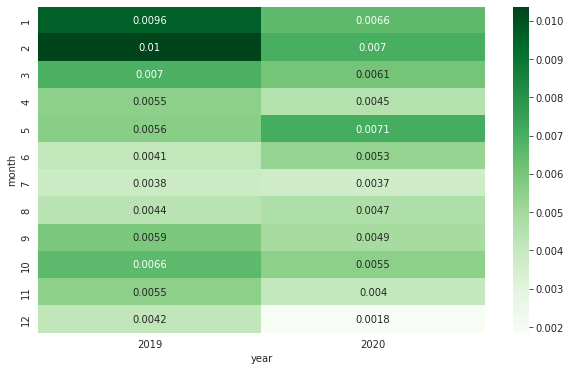

In [91]:
plt.figure(figsize= (10,6))
sns.heatmap(pivot5, cmap = "Greens", annot = True)
plt.show()

Inference : Most fraudulent transactions are performed in Jan and Feb 2019.

In [92]:
#age_group v/s dist_range_km Type v/s is_fraud
pivot6 = pd.pivot_table(data = data, index = "age_group", columns = "dist_range_km", values = "is_fraud")
pivot6

dist_range_km,<25,25-50,50-100,100-150,150-200,200-250,250-300,300+
age_group,,,,,,,,
<25,0.002339,0.004597,0.005909,0.004837,0.005272,0.004972,0.004906,NaN
25-40,0.004864,0.004351,0.004394,0.004580,0.004490,0.004512,0.004530,0.0
40-60,0.005181,0.004824,0.004720,0.005237,0.004858,0.004941,0.004486,NaN
60-80,0.003732,0.006325,0.006304,0.006425,0.006484,0.006295,0.006184,NaN
80+,0.007386,0.005403,0.007032,0.007778,0.007452,0.008259,0.005165,NaN


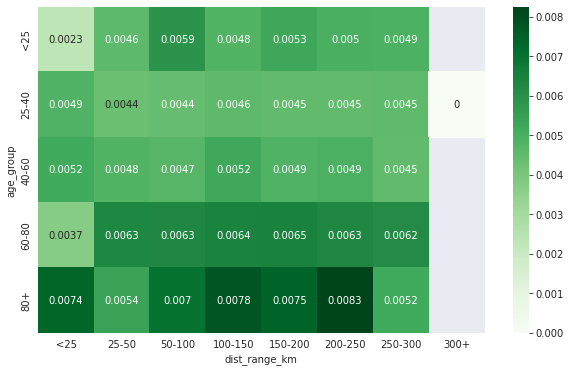

In [93]:
plt.figure(figsize= (10,6))
sns.heatmap(pivot6, cmap = "Greens", annot = True)
plt.show()

Inference: Transactions performed by 80+ ages customers at a distance of 200-250 kms from customer location should be scrutinized as they indicate fraud

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   job                    object        
 10  merch_lat              float64       
 11  merch_long             float64       
 12  is_fraud               int64         
 13  Customer_name          object        
 14  Population_group       category      
 15  age                    int64         
 16  age_group              category      
 17  distance               float64       
 18  dist_range_km          

In [95]:
#transaction_hour v/s day_of_week Type v/s is_fraud
pivot7 = pd.pivot_table(data = data, index = "transaction_hour", columns = "day_of_week", values = "is_fraud")
pivot7

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
transaction_hour,,,,,,,
0,0.015535,0.010606,0.014499,0.011719,0.018476,0.012187,0.015584
1,0.015517,0.010065,0.015849,0.011725,0.018705,0.011638,0.014928
2,0.017837,0.009553,0.014767,0.011323,0.015264,0.011757,0.014354
3,0.015463,0.011648,0.014279,0.012214,0.012023,0.012467,0.016029
4,0.001578,0.000499,0.000826,0.000718,0.001809,0.001464,0.000687
5,0.001296,0.000837,0.001647,0.000996,0.002021,0.001599,0.001342
6,0.001137,0.000839,0.000829,0.000968,0.000438,0.001135,0.000837
7,0.001289,0.001320,0.000805,0.001267,0.001777,0.000453,0.001703
8,0.001253,0.001017,0.000794,0.000980,0.001035,0.000912,0.000842


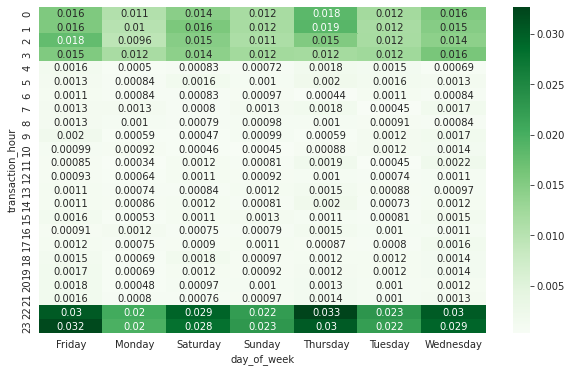

In [96]:
plt.figure(figsize= (10,6))
sns.heatmap(pivot7, cmap = "Greens", annot = True)
plt.show()

Inference : Transactions performed at ODD HOURS in mid week should be scrutinized

In [97]:
#transaction_hour v/s gender Type v/s is_fraud
pivot8 = pd.pivot_table(data = data, index = "transaction_hour", columns = "gender", values = "is_fraud")
pivot8

gender,F,M
transaction_hour,,
0,0.014518,0.012540
1,0.014542,0.012337
2,0.014326,0.011660
3,0.013768,0.012513
4,0.000993,0.001045
5,0.001283,0.001383
6,0.000829,0.000964
7,0.001405,0.000966
8,0.001016,0.000931


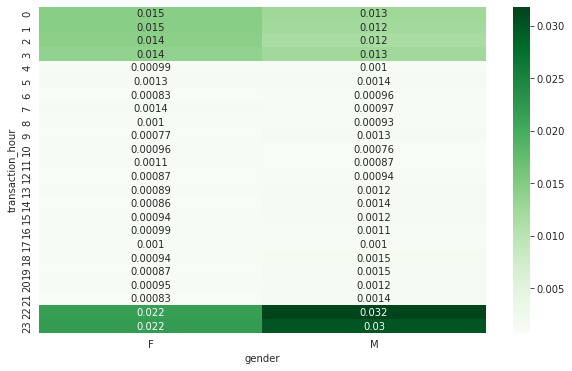

In [98]:
plt.figure(figsize= (10,6))
sns.heatmap(pivot8, cmap = "Greens", annot = True)
plt.show()

Inference : Transactions performed at odd hours by male customers can be fraudulent

In [99]:
#transaction_hour v/s dist_range_km Type v/s is_fraud
pivot9 = pd.pivot_table(data = data, index = "transaction_hour", columns = "dist_range_km", values = "is_fraud")
pivot9

dist_range_km,<25,25-50,50-100,100-150,150-200,200-250,250-300,300+
transaction_hour,,,,,,,,
0,0.021628,0.010159,0.013836,0.014250,0.013762,0.012554,0.012221,NaN
1,0.011480,0.012527,0.012959,0.013517,0.014523,0.013288,0.008667,NaN
2,0.009321,0.015191,0.012768,0.014867,0.012196,0.011961,0.013774,NaN
3,0.016064,0.010865,0.013748,0.013682,0.013233,0.012257,0.013051,NaN
4,0.000000,0.001760,0.000955,0.000719,0.001312,0.000994,0.000562,NaN
5,0.000000,0.001702,0.001211,0.001309,0.001344,0.001471,0.001117,NaN
6,0.002721,0.002596,0.000759,0.001099,0.000812,0.000404,0.001098,NaN
7,0.000000,0.000430,0.001085,0.001426,0.001513,0.000900,0.000000,NaN
8,0.001258,0.000437,0.001510,0.000779,0.001071,0.000737,0.001083,NaN


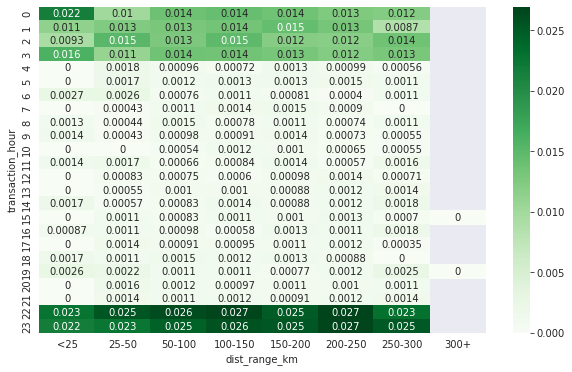

In [100]:
plt.figure(figsize= (10,6))
sns.heatmap(pivot9, cmap = "Greens", annot = True)
plt.show()

Inference : Transactions performed at odd hours irrespective of distance from customer location indicate fraud

### 4.4 Checking skewness in data


In [101]:
data.describe()

,amt,lat,long,merch_lat,merch_long,is_fraud,age,distance,year,month,transaction_hour
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,7.006357e+01,6.726379e-01,-1.574773e+00,6.726320e-01,-1.574775e+00,5.210015e-03,4.824808e+01,1.522712e+02,2.019501e+03,7.152067e+00,1.280612e+01
std,1.592540e+02,8.851386e-02,2.399460e-01,8.910960e-02,2.401519e-01,7.199217e-02,1.740900e+01,5.825222e+01,4.999996e-01,3.424954e+00,6.815753e+00
min,1.000000e+00,3.495388e-01,-2.891527e+00,3.320912e-01,-2.908968e+00,0.000000e+00,1.700000e+01,4.452300e-02,2.019000e+03,1.000000e+00,0.000000e+00
25%,9.640000e+00,6.050865e-01,-1.689444e+00,6.063295e-01,-1.691214e+00,0.000000e+00,3.500000e+01,1.106749e+02,2.019000e+03,4.000000e+00,7.000000e+00
50%,4.745000e+01,6.868621e-01,-1.526760e+00,6.871169e-01,-1.526128e+00,0.000000e+00,4.600000e+01,1.564819e+02,2.020000e+03,7.000000e+00,1.400000e+01
75%,8.310000e+01,7.319981e-01,-1.399021e+00,7.322749e-01,-1.400541e+00,0.000000e+00,5.900000e+01,1.970808e+02,2.020000e+03,1.000000e+01,1.900000e+01
max,2.894890e+04,1.164018e+00,-1.185956e+00,1.178276e+00,-1.168514e+00,1.000000e+00,9.700000e+01,3.043299e+02,2.020000e+03,1.200000e+01,2.300000e+01


In [102]:
cols = ['amt', 'age', 'distance']

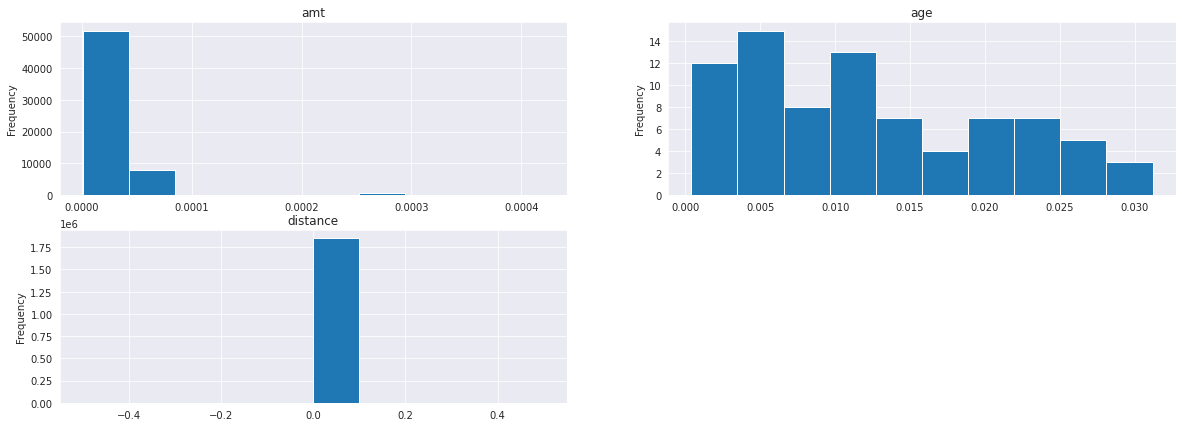

In [103]:
plt.figure(figsize=[20,7])
for ind, col in enumerate(cols):
    plt.subplot(2,2,ind+1)
    data[col].value_counts(normalize=True).plot.hist()
    plt.title(col)
plt.show()

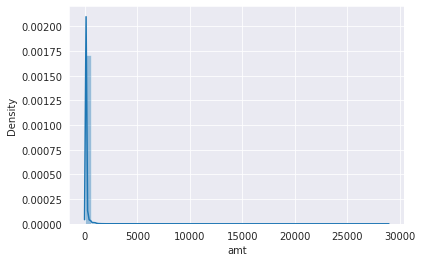

In [104]:
sns.distplot(data.amt)
plt.show()

Inference : We can see that amt variable is skewed.



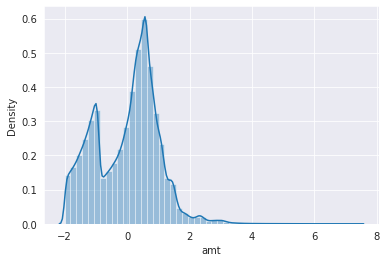

In [105]:
# Applying Power Transaformation

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

data['amt'] = pt.fit_transform(data[['amt']])

sns.distplot(data.amt)
plt.show()

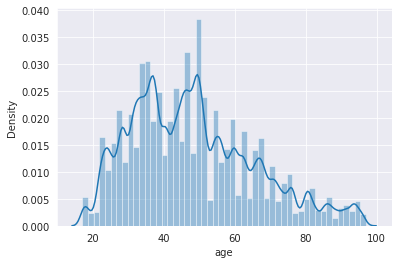

In [106]:
sns.distplot(data.age)
plt.show()

# 5. Model Building


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   job                    object        
 10  merch_lat              float64       
 11  merch_long             float64       
 12  is_fraud               int64         
 13  Customer_name          object        
 14  Population_group       category      
 15  age                    int64         
 16  age_group              category      
 17  distance               float64       
 18  dist_range_km          

In [108]:
data.merchant.value_counts()

fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: merchant, Length: 693, dtype: int64

In [109]:
data.job.value_counts()

Film/video editor                                              13898
Exhibition designer                                            13167
Surveyor, land/geomatics                                       12436
Naval architect                                                12434
Materials engineer                                             11711
Designer, ceramics/pottery                                     11688
Environmental consultant                                       10974
Financial adviser                                              10963
Systems developer                                              10962
IT trainer                                                     10943
Copywriter, advertising                                        10241
Scientist, audiological                                        10234
Chartered public finance accountant                            10211
Chief Executive Officer                                        10199
Podiatrist                        

In [110]:
len(data.job.value_counts())

497

### Removing unwanted colums


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   job                    object        
 10  merch_lat              float64       
 11  merch_long             float64       
 12  is_fraud               int64         
 13  Customer_name          object        
 14  Population_group       category      
 15  age                    int64         
 16  age_group              category      
 17  distance               float64       
 18  dist_range_km          

In [112]:
data.transaction_hour.value_counts()

23    95902
22    95370
16    94289
18    94052
21    93738
17    93514
13    93492
15    93439
19    93433
12    93294
14    93089
20    93081
1     61330
3     60968
2     60796
0     60655
8     60498
6     60406
10    60320
7     60301
9     60231
11    60170
5     60088
4     59938
Name: transaction_hour, dtype: int64

In [113]:
data.drop(['trans_date_trans_time', "lat", "long", "merch_lat", "merch_long", "year"], axis=1, inplace=True)

In [114]:
data.drop(["merchant", "city", "job"], axis=1, inplace=True)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column            Dtype   
---  ------            -----   
 0   category          object  
 1   amt               float64 
 2   gender            object  
 3   state             object  
 4   is_fraud          int64   
 5   Customer_name     object  
 6   Population_group  category
 7   age               int64   
 8   age_group         category
 9   distance          float64 
 10  dist_range_km     category
 11  month             int64   
 12  day_of_week       object  
 13  transaction_hour  int64   
dtypes: category(3), float64(2), int64(4), object(5)
memory usage: 174.9+ MB


## 5.1 Train-Test Split


In [116]:
#Peform the train test split 
train,test = train_test_split(data,test_size=0.3,random_state=42, stratify=data.is_fraud)

In [117]:
# check the training and testing data shape
print(f"train data shape:{train.shape}")
print(f"Test data shape:{test.shape}")

train data shape:(1296675, 14)
Test data shape:(555719, 14)


In [118]:
train.is_fraud.value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

In [119]:
test.is_fraud.value_counts(normalize=True)

0    0.994791
1    0.005209
Name: is_fraud, dtype: float64

In [120]:
# segregate  X_train and y_train 
y_train = train.pop("is_fraud")
X_train = train

In [121]:
# Segregate X_test and y_test
y_test = test.pop("is_fraud")
X_test = test

In [122]:
X_train.head()

,category,amt,gender,state,Customer_name,Population_group,age,age_group,distance,dist_range_km,month,day_of_week,transaction_hour
310055,gas_transport,0.434715,F,TX,Candice Brown,<5lac,39,25-40,141.302192,100-150,10,Saturday,4
762160,misc_pos,-1.257776,M,AL,Samuel Farrell,<5lac,45,40-60,50.953633,50-100,11,Friday,18
150128,shopping_pos,-0.910494,F,KS,Sarah Scott,<5lac,91,80+,42.182693,25-50,8,Wednesday,10
172336,personal_care,-1.187022,M,NY,Steven Faulkner,<5lac,69,60-80,208.255074,200-250,3,Sunday,17
68192,entertainment,-0.410880,F,WV,Jessica Werner,<5lac,50,40-60,218.644832,200-250,7,Tuesday,14


### Creating Dummy variables



In [123]:
X_train['transaction_hour']= X_train['transaction_hour'].astype(str)

In [124]:
X_train['month']= X_train['month'].astype(str)

In [125]:
X_test['transaction_hour']= X_test['transaction_hour'].astype(str)

X_test['month']= X_test['month'].astype(str)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column            Dtype   
---  ------            -----   
 0   category          object  
 1   amt               float64 
 2   gender            object  
 3   state             object  
 4   is_fraud          int64   
 5   Customer_name     object  
 6   Population_group  category
 7   age               int64   
 8   age_group         category
 9   distance          float64 
 10  dist_range_km     category
 11  month             int64   
 12  day_of_week       object  
 13  transaction_hour  int64   
dtypes: category(3), float64(2), int64(4), object(5)
memory usage: 174.9+ MB


In [127]:
cat_cols = ["category", "state", "month", "day_of_week", "transaction_hour", 'gender', 'Population_group','age_group', 'dist_range_km']

In [128]:
dummy = pd.get_dummies(X_train[cat_cols], drop_first=True)

In [129]:
# Adding the results to the master dataframe
X_train = pd.concat([X_train, dummy], axis=1)

In [130]:
X_train.drop(cat_cols, axis=1, inplace=True)

In [131]:
X_train.head()

,amt,Customer_name,age,distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,transaction_hour_1,transaction_hour_10,transaction_hour_11,transaction_hour_12,transaction_hour_13,transaction_hour_14,transaction_hour_15,transaction_hour_16,transaction_hour_17,transaction_hour_18,transaction_hour_19,transaction_hour_2,transaction_hour_20,transaction_hour_21,transaction_hour_22,transaction_hour_23,transaction_hour_3,transaction_hour_4,transaction_hour_5,transaction_hour_6,transaction_hour_7,transaction_hour_8,transaction_hour_9,gender_M,Population_group_5-10lac,Population_group_10-15lac,Population_group_15-20,Population_group_20-25lac,Population_group_25-30lac,age_group_25-40,age_group_40-60,age_group_60-80,age_group_80+,dist_range_km_25-50,dist_range_km_50-100,dist_range_km_100-150,dist_range_km_150-200,dist_range_km_200-250,dist_range_km_250-300,dist_range_km_300+
310055,0.434715,Candice Brown,39,141.302192,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
762160,-1.257776,Samuel Farrell,45,50.953633,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
150128,-0.910494,Sarah Scott,91,42.182693,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
172336,-1.187022,Steven Faulkner,69,208.255074,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
68192,-0.410880,Jessica Werner,50,218.644832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


### Scale the numerical variables of train data



In [132]:
X_train.drop(['age','distance'], axis=1, inplace=True)

In [133]:
X_train.head()

,amt,Customer_name,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,transaction_hour_1,transaction_hour_10,transaction_hour_11,transaction_hour_12,transaction_hour_13,transaction_hour_14,transaction_hour_15,transaction_hour_16,transaction_hour_17,transaction_hour_18,transaction_hour_19,transaction_hour_2,transaction_hour_20,transaction_hour_21,transaction_hour_22,transaction_hour_23,transaction_hour_3,transaction_hour_4,transaction_hour_5,transaction_hour_6,transaction_hour_7,transaction_hour_8,transaction_hour_9,gender_M,Population_group_5-10lac,Population_group_10-15lac,Population_group_15-20,Population_group_20-25lac,Population_group_25-30lac,age_group_25-40,age_group_40-60,age_group_60-80,age_group_80+,dist_range_km_25-50,dist_range_km_50-100,dist_range_km_100-150,dist_range_km_150-200,dist_range_km_200-250,dist_range_km_250-300,dist_range_km_300+
310055,0.434715,Candice Brown,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
762160,-1.257776,Samuel Farrell,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
150128,-0.910494,Sarah Scott,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
172336,-1.187022,Steven Faulkner,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
68192,-0.410880,Jessica Werner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [134]:
scaler = MinMaxScaler()

scale_var = ["amt"]

X_train[scale_var] = scaler.fit_transform(X_train[scale_var])  # Scaling of train set 

In [135]:
X_train.describe()  # Check if scaling is proper

,amt,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,transaction_hour_1,transaction_hour_10,transaction_hour_11,transaction_hour_12,transaction_hour_13,transaction_hour_14,transaction_hour_15,transaction_hour_16,transaction_hour_17,transaction_hour_18,transaction_hour_19,transaction_hour_2,transaction_hour_20,transaction_hour_21,transaction_hour_22,transaction_hour_23,transaction_hour_3,transaction_hour_4,transaction_hour_5,transaction_hour_6,transaction_hour_7,transaction_hour_8,transaction_hour_9,gender_M,Population_group_5-10lac,Population_group_10-15lac,Population_group_15-20,Population_group_20-25lac,Population_group_25-30lac,age_group_25-40,age_group_40-60,age_group_60-80,age_group_80+,dist_range_km_25-50,dist_range_km_50-100,dist_range_km_100-150,dist_range_km_150-200,dist_range_km_200-250,dist_range_km_250-300,dist_range_km_300+
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,2.152612e-01,7.077641e-02,1.015466e-01,3.499798e-02,9.503152e-02,6.622862e-02,9.465132e-02,8.726165e-02,4.883182e-02,6.175102e-02,7.033682e-02,7.507587e-02,8.962307e-02,3.130623e-02,3.161394e-02,2.407465e-02,8.355216e-03,4.351977e-02,1.065109e-02,5.871942e-03,2.760137e-03,4.627220e-06,3.286328e-02,2.016157e-02,1.991247e-03,2.089730e-02,4.379663e-03,3.355968e-02,2.130526e-02,1.777238e-02,2.202094e-02,1.611969e-02,9.482715e-03,2.027416e-02,1.264079e-02,3.551314e-02,2.435383e-02,2.962500e-02,1.624463e-02,9.093258e-03,2.321090e-02,1.149247e-02,1.875566e-02,6.360885e-03,1.903870e-02,1.269401e-02,4.330306e-03,6.434534e-02,3.594501e-02,2.054640e-02,1.429734e-02,6.175333e-02,4.002545e-04,2

### Dummy variables creation for X_test



In [136]:
dummy1 = pd.get_dummies(X_test[cat_cols], drop_first=True)

# Adding the results to the master dataframe
X_test = pd.concat([X_test, dummy1], axis=1)

X_test.drop(cat_cols, axis=1, inplace=True)

In [137]:
X_test.drop(['age','distance'], axis=1, inplace=True)

In [138]:
X_test.head()

,amt,Customer_name,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,transaction_hour_1,transaction_hour_10,transaction_hour_11,transaction_hour_12,transaction_hour_13,transaction_hour_14,transaction_hour_15,transaction_hour_16,transaction_hour_17,transaction_hour_18,transaction_hour_19,transaction_hour_2,transaction_hour_20,transaction_hour_21,transaction_hour_22,transaction_hour_23,transaction_hour_3,transaction_hour_4,transaction_hour_5,transaction_hour_6,transaction_hour_7,transaction_hour_8,transaction_hour_9,gender_M,Population_group_5-10lac,Population_group_10-15lac,Population_group_15-20,Population_group_20-25lac,Population_group_25-30lac,age_group_25-40,age_group_40-60,age_group_60-80,age_group_80+,dist_range_km_25-50,dist_range_km_50-100,dist_range_km_100-150,dist_range_km_150-200,dist_range_km_200-250,dist_range_km_250-300,dist_range_km_300+
206724,0.936116,Samuel Farrell,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
158457,-1.305020,Margaret Ward,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
201199,-1.063659,Ana Howell,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
394693,-1.080325,Rebecca Butler,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
324021,0.821186,Jared Camacho,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [139]:
X_test[scale_var] = scaler.transform(X_test[scale_var])

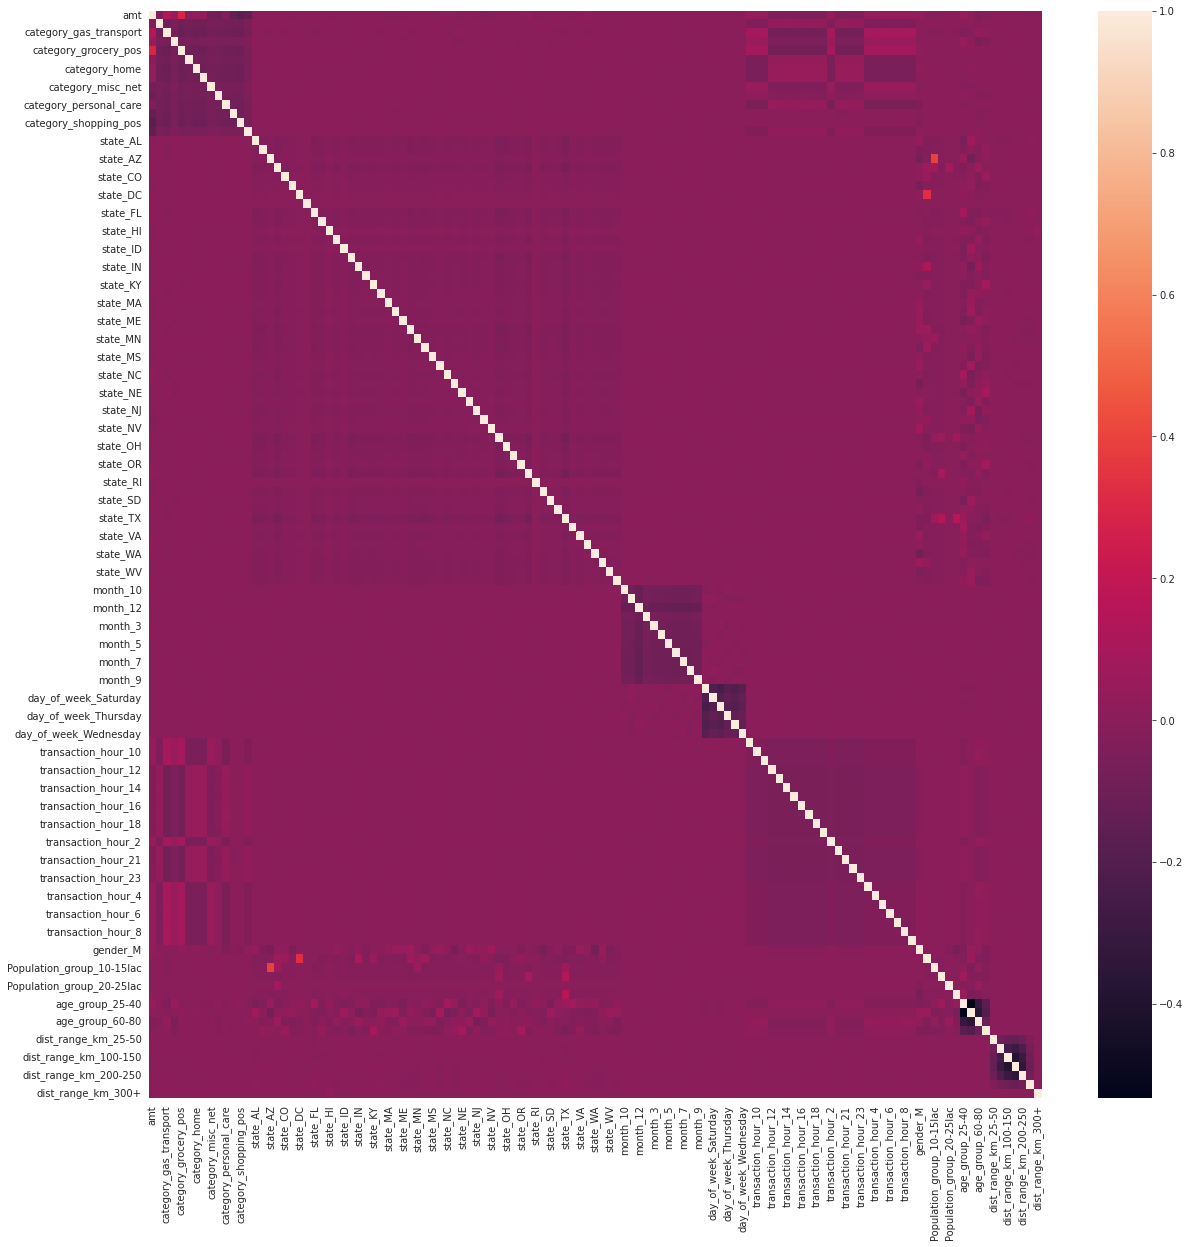

In [140]:
#Check heatmap for correlation

plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr())
plt.show()

In [141]:
# check the training and testing data shape
print(f"train data shape:{X_train.shape}")
print(f"Test data shape:{X_test.shape}")

train data shape:(1296675, 122)
Test data shape:(555719, 122)


### Feature Selection

In [142]:
X_train.drop(['Customer_name'],axis=1,inplace=True)

In [143]:
# run random forest to get feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 25).fit(X_train, y_train)

feats = X_train.columns

for feature in zip(feats, rf.feature_importances_):
    print(feature)

('amt', 0.45983779003094877)
('category_food_dining', 0.002010661846159218)
('category_gas_transport', 0.0147039290079021)
('category_grocery_net', 0.0016113601902250359)
('category_grocery_pos', 0.05619650206566821)
('category_health_fitness', 0.0019053909379846178)
('category_home', 0.00372854610964168)
('category_kids_pets', 0.00213326781646315)
('category_misc_net', 0.010440543048057332)
('category_misc_pos', 0.011144229941297093)
('category_personal_care', 0.002803666785373368)
('category_shopping_net', 0.011834592701490076)
('category_shopping_pos', 0.009494478231712962)
('category_travel', 0.006704446931371096)
('state_AL', 0.0025134593297656753)
('state_AR', 0.0024111000140588)
('state_AZ', 0.0006835677082044497)
('state_CA', 0.0035050319942320496)
('state_CO', 0.0013142175192660634)
('state_CT', 0.0008137140175134145)
('state_DC', 0.0003136987302141897)
('state_DE', 0.0004904905210241263)
('state_FL', 0.003374661666930368)
('state_GA', 0.0020212371878534164)
('state_HI', 0.000

In [144]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.459838
4,category_grocery_pos,0.056197
95,transaction_hour_22,0.027269
96,transaction_hour_23,0.019607
112,age_group_60-80,0.019374
104,gender_M,0.015372
2,category_gas_transport,0.014704
110,age_group_25-40,0.013671
111,age_group_40-60,0.012147
11,category_shopping_net,0.011835


In [145]:
cols_for_model = ['amt', 'category_grocery_pos', 'transaction_hour_22', 'transaction_hour_23', 'category_gas_transport',
                 'age_group_60-80', 'gender_M', 'age_group_25-40', 'age_group_40-60', 'category_misc_net', 'dist_range_km_150-200',
                 'category_misc_pos', 'category_shopping_net', 'dist_range_km_100-150', 'day_of_week_Sunday', 'dist_range_km_200-250',
                 'category_shopping_pos', 'age_group_80+', 'day_of_week_Saturday']

In [146]:
X_train = X_train[cols_for_model]

In [147]:
X_test = X_test[cols_for_model]

In [148]:
X_train.columns

Index(['amt', 'category_grocery_pos', 'transaction_hour_22', 'transaction_hour_23', 'category_gas_transport', 'age_group_60-80', 'gender_M', 'age_group_25-40', 'age_group_40-60', 'category_misc_net', 'dist_range_km_150-200', 'category_misc_pos', 'category_shopping_net', 'dist_range_km_100-150', 'day_of_week_Sunday', 'dist_range_km_200-250', 'category_shopping_pos', 'age_group_80+', 'day_of_week_Saturday'], dtype='object')

## 5.2 Handling Class Imbalance


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [150]:
# check the training and testing data shape
print(f"train data shape:{X_train.shape}")
print(f"Test data shape:{X_test.shape}")

train data shape:(1296675, 19)
Test data shape:(555719, 19)


In [151]:
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

0    1289919
1       6756
Name: is_fraud, dtype: int64


,index,is_fraud
0,0,0.99479
1,1,0.00521


In [152]:
print(y_test.value_counts())
y_test.value_counts(normalize = True).reset_index()

0    552824
1      2895
Name: is_fraud, dtype: int64


,index,is_fraud
0,0,0.994791
1,1,0.005209


## 5.3 Logistic regression


In [153]:
# Base model
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [154]:
y_pred = lreg.predict(X_test)

In [155]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9959979773950504
F1 score:  0.4265085095410005
Recall:  0.2856649395509499
Precision:  0.8413021363173957

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.84      0.29      0.43      2895

    accuracy                           1.00    555719
   macro avg       0.92      0.64      0.71    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[552668    156]
 [  2068    827]]


We can handle imbalanced classes by balancing the classes by increasing minority or decreasing majority.

We can do that by following few techniques

1. Random Under-Sampling
2. Random Over-Sampling
3. SMOTE - Synthetic Minority Oversampling Technique
4. ADASYN - Adaptive Synthetic Sampling Method
5. SMOTETomek - Over-sampling followed by under-sampling

Undersampling tends to loss of data so we will not use that. We will go with Random Over-Sampling, SMOTE - Synthetic Minority Oversampling Technique, ADASYN - Adaptive Synthetic Sampling Method and see which technique works better.

In [156]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Random Over-Sampling

1. Randomly add more minority observations by replication
2. No information loss
3. Prone to overfitting due to copying same information



In [157]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

2579838

In [158]:
from collections import Counter
print(sorted(Counter(y_resampled_os).items()))

[(0, 1289919), (1, 1289919)]


In [159]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [160]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.7644780905457614
F1 score:  0.035490051584377305
Recall:  0.8317789291882556
Precision:  0.018131847445502804

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.87    552824
           1       0.02      0.83      0.04      2895

    accuracy                           0.76    555719
   macro avg       0.51      0.80      0.45    555719
weighted avg       0.99      0.76      0.86    555719


 confussion matrix:
 [[422427 130397]
 [   487   2408]]


SMOTE - Synthetic Minority Oversampling Technique Creates new "Synthetic" observations

Process: -

1. Identify the feature vector and its nearest neighbour
2. Take the difference between the two
3. Multiply the difference with a random number between 0 and 1
4. Identify a new point on the line segment by adding the random number to feature vector
5. Repeat the process for identified feature vectors

In [161]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

2579838

In [162]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 1289919), (1, 1289919)]


In [163]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [164]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.7688634003876059
F1 score:  0.035893086340061095
Recall:  0.8259067357512954
Precision:  0.018345174704988722

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87    552824
           1       0.02      0.83      0.04      2895

    accuracy                           0.77    555719
   macro avg       0.51      0.80      0.45    555719
weighted avg       0.99      0.77      0.86    555719


 confussion matrix:
 [[424881 127943]
 [   504   2391]]


ADASYN

1. In ADASYN, the minority examples are generated based on their density distribution.
2. More synthetic data are generated from minority class samples that are harder to learn as compared with those minority samples that are easier to learn.

In [165]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

2580348

In [166]:
print(sorted(Counter(y_resampled_ada).items()))

[(0, 1289919), (1, 1290429)]


In [167]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [168]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.843536031699474
F1 score:  0.0445054945054945
Recall:  0.6994818652849741
Precision:  0.022983939617501843

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91    552824
           1       0.02      0.70      0.04      2895

    accuracy                           0.84    555719
   macro avg       0.51      0.77      0.48    555719
weighted avg       0.99      0.84      0.91    555719


 confussion matrix:
 [[466744  86080]
 [   870   2025]]


## 5.4 Decision Trees


In [169]:
# Decision Trees - Base
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [170]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print ('F1 score: ', f1_score(y_test, y_pred_dtc))
print ('Recall: ', recall_score(y_test, y_pred_dtc))
print ('Precision: ', precision_score(y_test, y_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc))

Accuracy:  0.9966097973976056
F1 score:  0.6792645556690501
Recall:  0.689119170984456
Precision:  0.6696878147029205

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.67      0.69      0.68      2895

    accuracy                           1.00    555719
   macro avg       0.83      0.84      0.84    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[551840    984]
 [   900   1995]]


In [171]:
# Decision Trees - Random Over-Sampling
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os, y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [172]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  0.9964154545732645
F1 score:  0.6627158821537419
Recall:  0.6759930915371329
Precision:  0.649950182663567

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.65      0.68      0.66      2895

    accuracy                           1.00    555719
   macro avg       0.82      0.84      0.83    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[551770   1054]
 [   938   1957]]


In [173]:
# Decision Trees - SMOTE
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [174]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.9540109299843986
F1 score:  0.1609927448212468
Recall:  0.8469775474956822
Precision:  0.08895015598926213

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    552824
           1       0.09      0.85      0.16      2895

    accuracy                           0.95    555719
   macro avg       0.54      0.90      0.57    555719
weighted avg       0.99      0.95      0.97    555719


 confussion matrix:
 [[527710  25114]
 [   443   2452]]


In [175]:
# Decision Trees - ADASYN
from sklearn.tree import DecisionTreeClassifier
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [176]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ada))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ada))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ada))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ada))

Accuracy:  0.9341609698426723
F1 score:  0.11937999422354867
Recall:  0.8566493955094991
Precision:  0.06416060849093214

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97    552824
           1       0.06      0.86      0.12      2895

    accuracy                           0.93    555719
   macro avg       0.53      0.90      0.54    555719
weighted avg       0.99      0.93      0.96    555719


 confussion matrix:
 [[516651  36173]
 [   415   2480]]


## 5.5 Random Forest

In [177]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [178]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9972144195177779
F1 score:  0.7195652173913043
Recall:  0.6860103626943005
Precision:  0.7565714285714286

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.76      0.69      0.72      2895

    accuracy                           1.00    555719
   macro avg       0.88      0.84      0.86    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[552185    639]
 [   909   1986]]


In [179]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [180]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9966853751626271
F1 score:  0.686307901907357
Recall:  0.696027633851468
Precision:  0.6768558951965066

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.68      0.70      0.69      2895

    accuracy                           1.00    555719
   macro avg       0.84      0.85      0.84    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[551862    962]
 [   880   2015]]


In [181]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [182]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.9541296950437181
F1 score:  0.15901817821912836
Recall:  0.8324697754749568
Precision:  0.08790487306682229

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    552824
           1       0.09      0.83      0.16      2895

    accuracy                           0.95    555719
   macro avg       0.54      0.89      0.57    555719
weighted avg       0.99      0.95      0.97    555719


 confussion matrix:
 [[527818  25006]
 [   485   2410]]


In [183]:
# Random Forest - ADASYN
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [184]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  0.9337578884292241
F1 score:  0.11666746652589145
Recall:  0.8397236614853195
Precision:  0.06268856855514583

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97    552824
           1       0.06      0.84      0.12      2895

    accuracy                           0.93    555719
   macro avg       0.53      0.89      0.54    555719
weighted avg       0.99      0.93      0.96    555719


 confussion matrix:
 [[516476  36348]
 [   464   2431]]


## 5.6 XGBoost

In [185]:
from xgboost import XGBClassifier

# XGBoost - Random Over-Sampling
xgb_os = XGBClassifier()
xgb_os.fit(X_resampled_os, y_resampled_os)

y_pred_xgb_os = xgb_os.predict(X_test)

In [186]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_xgb_os))
print ('F1 score: ', f1_score(y_test, y_pred_xgb_os))
print ('Recall: ', recall_score(y_test, y_pred_xgb_os))
print ('Precision: ', precision_score(y_test, y_pred_xgb_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_xgb_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_xgb_os))

Accuracy:  0.961147630367146
F1 score:  0.19941414216322445
Recall:  0.9288428324697755
Precision:  0.1116972667608208

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    552824
           1       0.11      0.93      0.20      2895

    accuracy                           0.96    555719
   macro avg       0.56      0.95      0.59    555719
weighted avg       0.99      0.96      0.98    555719


 confussion matrix:
 [[531439  21385]
 [   206   2689]]


In [187]:
# XGB - SMOTE
xgb_smt = XGBClassifier()
xgb_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_xgb_smt = xgb_smt.predict(X_test)

In [188]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_xgb_smt))
print ('F1 score: ', f1_score(y_test, y_pred_xgb_smt))
print ('Recall: ', recall_score(y_test, y_pred_xgb_smt))
print ('Precision: ', precision_score(y_test, y_pred_xgb_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_xgb_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_xgb_smt))

Accuracy:  0.9601543225982916
F1 score:  0.194770718935234
Recall:  0.9250431778929188
Precision:  0.10884409039180622

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    552824
           1       0.11      0.93      0.19      2895

    accuracy                           0.96    555719
   macro avg       0.55      0.94      0.59    555719
weighted avg       0.99      0.96      0.98    555719


 confussion matrix:
 [[530898  21926]
 [   217   2678]]


In [189]:
# XGB - ADASYN
xgb_ada = XGBClassifier()
xgb_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_xgb_ada = xgb_ada.predict(X_test)

In [190]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_xgb_ada))
print ('F1 score: ', f1_score(y_test, y_pred_xgb_ada))
print ('Recall: ', recall_score(y_test, y_pred_xgb_ada))
print ('Precision: ', precision_score(y_test, y_pred_xgb_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_xgb_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_xgb_ada))

Accuracy:  0.8751023448901333
F1 score:  0.07448595887671014
Recall:  0.9647668393782384
Precision:  0.03873840136479008

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    552824
           1       0.04      0.96      0.07      2895

    accuracy                           0.88    555719
   macro avg       0.52      0.92      0.50    555719
weighted avg       0.99      0.88      0.93    555719


 confussion matrix:
 [[483518  69306]
 [   102   2793]]


We need to fine tune the model that gives us the Best combintion of ACCURACY and RECALL. If we compare all the executed models as in above image, we see that we get a decent ACCURACY RECALL combination for the following models :

- Logistic Regression SMOTE model
- Decision Tree SMOTE model
- XGBoost ADASYN model
- Random Forest ADASYN model

Hence we perform fine tuning of these models to extract 10 most important features that are better predictors of fraud.



# 6. Hyperparameter Tuning
## Logistic Regression SMOTE - Recursive Feature Elimination - RFE

In [191]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

In [192]:
rfe = RFE(estimator=lreg_smt, n_features_to_select=10) # Selecting 10 features that are important

In [ ]:
rfe.fit(X_resampled_smt, y_resampled_smt)

In [ ]:
rfe.ranking_

In [ ]:
X_resampled_ada.columns[rfe.support_]

In [ ]:
X_resampled_ada2 = X_resampled_ada.loc[:,rfe.support_]
X_resampled_ada2.shape

In [ ]:
# Top 10 important features
X_resampled_ada2.columns

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(lreg_ada, X_resampled_ada2, y_resampled_ada, n_jobs=-1)

## Cross validation for feature selection - Logistic Regression SMOTE

In [ ]:
num_features = X_resampled_smt.shape
num_features[1]

In [ ]:
rfecv = RFECV(estimator=lreg_smt, cv=5)

In [ ]:
%%time
rfecv.fit(X_resampled_smt, y_resampled_smt)

In [ ]:
rfecv.grid_scores_

In [ ]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.n_features_

In [ ]:
rfecv.support_

## Hyperparameter tuning using Cross Validation for Decision Tree SMOTE

In [ ]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100]
}

In [ ]:
model_rcv_dt = RandomizedSearchCV(estimator=dtc_smt, 
                              param_distributions=params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=20)

In [ ]:
%%time
model_rcv_dt.fit(X_resampled_smt, y_resampled_smt)

In [ ]:
model_rcv_dt.best_score_

In [ ]:
dt_best = model_rcv_dt.best_estimator_
dt_best

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_best, X_resampled_smt, y_resampled_smt)
plt.show()

## Hyper-parameter tuning using Cross Validation for XGBOOST ADASYN model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hyper_params = {'max_depth': range(3, 10),
                'max_features': range(3, 10),
                'min_samples_leaf': range(20, 200, 50),
                'n_estimators': range(10, 51, 10)}

In [ ]:
# Performing Randomizedsearch for XGBoost ADASYN model
model_rcv_xgb = RandomizedSearchCV(estimator=xgb_ada, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=20)

In [ ]:
model_rcv_xgb.fit(X_resampled_ada, y_resampled_ada)

In [ ]:
model_rcv_xgb.best_score_

In [ ]:
model_rcv_xgb.best_estimator_     # Displaying best values for hyperparameters

In [ ]:
xgb_best = model_rcv_xgb.best_estimator_ # Naming the best model rf_best

In [ ]:
xgb_best # Displaying the hyperparametres

In [ ]:
y_pred_rcv_xgb = model_rcv_xgb.predict(X_test) # Predicting the is_fraud variable for test data


In [ ]:
# Evaluation Metrics - We see that we get good accuracy and Recall values
print ('Accuracy: ', accuracy_score(y_test, y_pred_rcv_xgb))
print ('F1 score: ', f1_score(y_test, y_pred_rcv_xgb))
print ('Recall: ', recall_score(y_test, y_pred_rcv_xgb))
print ('Precision: ', precision_score(y_test, y_pred_rcv_xgb))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rcv_xgb))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rcv_xgb))

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb_best, X_resampled_ada, y_resampled_ada, drop_intermediate=False)
plt.show()

In [ ]:
# Accuracy Score for Final Model : 92.5
# Recall for Final Model is 93.5
# list of important features

importances = xgb_best.feature_importances_
weights = pd.Series(importances,
                 index=X_resampled_ada.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## Hyper-parameter tuning using Cross Validation for Random Forest ADASYN model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hyper_params = {'max_depth': range(3, 10),
                'max_features': range(3, 10),
                'min_samples_leaf': range(20, 200, 50),
                'n_estimators': range(10, 51, 10)}

In [ ]:
# Performing Randomizedsearch for Random Forest ADASYN model
model_rcv = RandomizedSearchCV(estimator=rf_ada, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=20)

In [ ]:
model_rcv.fit(X_resampled_ada, y_resampled_ada)

In [ ]:
model_rcv.best_score_

In [ ]:
model_rcv.best_estimator_ # Displaying best values for hyperparameters

In [ ]:
rf_best = model_rcv.best_estimator_ # Naming the best model rf_best

In [ ]:
rf_best # Displaying the hyperparametres

In [ ]:
y_pred_rcv = rf_best.predict(X_test) # Predicting the is_fraud variable for test data

In [ ]:
# Evaluation Metrics - We see that we get good accuracy and Recall values
print ('Accuracy: ', accuracy_score(y_test, y_pred_rcv))
print ('F1 score: ', f1_score(y_test, y_pred_rcv))
print ('Recall: ', recall_score(y_test, y_pred_rcv))
print ('Precision: ', precision_score(y_test, y_pred_rcv))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rcv))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rcv))

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_best, X_resampled_ada, y_resampled_ada, drop_intermediate=False)
plt.show()

In [ ]:
# Accuracy Score for Final Model : 92.5
# Recall for Final Model is 93.7
# list of important features

importances = rf_best.feature_importances_
weights = pd.Series(importances,
                 index=X_resampled_ada.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

After comparing all the 4 fine tuned models, we conclude that XGBoost ADASYN (xgb_best) and Random Forest ADASYN (rf_best) are the best performing models.

Based upon the important features given by rach of the above 2 best models, following are the recommendations to FINEX company :
- In case the transaction amount seems unusual, the transaction should be checked for authenticity
- All the transactions performed during ODD Hours of the day like after 10pm or 11pm need checking
- Maximum faudulent transactions take place under the category gas_transport
- - Categories shopping_net, shopping_pos, grocery_pos, misc_net, misc_pos also contribute to high likelihood of fraudulent transactions
Considering all the above factors, mostly frauds are likely to be performed by male customers

# 7. Cost Benefit Analysis
We will be doing the Cost Benefit Analysis using XGBoost ADASYN (xgb_best) model

In [ ]:
data = pd.concat([data_train, data_test]) # Forming a consolidated dataset

In [ ]:
# Transaction date and time column

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extract year from trans_date_trans_time column

data['year'] = pd.DatetimeIndex(data['trans_date_trans_time']).year
data['month'] = pd.DatetimeIndex(data['trans_date_trans_time']).month

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
avg = data.groupby(['year', 'month']).is_fraud.count()
avg

In [ ]:
# Average number of transactions per month

Avg_tran_per_month = avg.sum()/24
Avg_tran_per_month

In [ ]:
fraud_trans = data[data['is_fraud']==1]

In [ ]:
avg_fraud = fraud_trans.groupby(['year', 'month']).is_fraud.count()
avg_fraud

In [ ]:
# Average number of fraudulent transactions per month

Avg_fraud_tran_per_month = avg_fraud.sum()/24
Avg_fraud_tran_per_month

In [ ]:
# Average amount per fraudulent transaction
fraud_trans.amt.mean()

In [ ]:
# Let TF be the average number of transactions per month detected as fraudulent by the model

TF = (41715+2706)/24    # (True Positives  + False Positives) as per xgb_best confusion matrix
TF

In [ ]:
# Let FN be the average number of transactions per month that are fraudulent but not detected by the model

FN = 189 # False Negatives as per xgb_best confusion matrix

In [ ]:
# Cost incurred per month before the model was deployed
Cost_Before = 402.125*530.66
print(Cost_Before)

# cost of providing customer executive support per fraudulent transaction detected by the model = $1.5

# Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)

Cost_cust_supp = TF*1.5
print(Cost_cust_supp)

# Cost incurred due to fraudulent transactions left undetected by the model
Cost_fraud = FN*530.66
print(Cost_fraud)

In [ ]:
# Cost incurred per month after the model is built and deployed

Cost_after_model = Cost_cust_supp + Cost_fraud
Cost_after_model

In [ ]:
# Final savings = Cost incurred before - Cost incurred after

Final_Savings = Cost_Before - Cost_after_model
Final_Savings